In [ ]:
%pip install pandas_montecarlo --upgrade --no-cache-dir


In [155]:
import pandas as pd
import numpy as np
import pandas_montecarlo

# Shiller monthly data

In [156]:
# From shiller 
df = pd.read_excel("ie_data.xls", "Data")


In [157]:
df[7:].head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
7,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,97.250271,5.694836,97.250271,...,NaN,NaN,NaN,NaN,NaN,1.004177,1,0.130609,0.092504,0.038106
8,1871.02,4.5,0.26,0.4,12.844641,1871.125,5.323333,95.644049,5.526101,96.104557,...,NaN,NaN,NaN,NaN,NaN,1.00418,0.974424,0.130858,0.094635,0.036224
9,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,96.551327,5.445411,97.472173,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
10,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,103.034548,5.651684,104.492692,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
11,1871.05,4.86,0.26,0.4,12.273812,1871.375,5.333333,108.099637,5.783108,110.118209,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.03315
12,1871.06,4.82,0.26,0.4,12.083481,1871.458333,5.336667,108.898625,5.8742,111.430773,...,NaN,NaN,NaN,NaN,NaN,1.004191,1.053249,0.123093,0.087725,0.035368
13,1871.07,4.73,0.26,0.4,12.083481,1871.541667,5.34,106.865248,5.8742,109.851015,...,NaN,NaN,NaN,NaN,NaN,1.004194,1.057663,0.120022,0.086581,0.033441
14,1871.08,4.79,0.26,0.4,11.893231,1871.625,5.343333,109.951982,5.968166,113.535234,...,NaN,NaN,NaN,NaN,NaN,1.004197,1.079088,0.111933,0.082669,0.029264
15,1871.09,4.84,0.26,0.4,12.178646,1871.708333,5.346667,108.496009,5.828298,112.533332,...,NaN,NaN,NaN,NaN,NaN,1.004199,1.058222,0.110028,0.081048,0.02898
16,1871.1,4.59,0.26,0.4,12.368896,1871.791667,5.35,101.309267,5.738651,105.575174,...,NaN,NaN,NaN,NaN,NaN,1.004202,1.04632,0.114765,0.081653,0.033113


In [158]:
# get percent change m-o-m
df2 = df[7:1808].copy()
df2["pct"] = pd.to_numeric(df2["Unnamed: 1"]).pct_change()
stdev = df2["pct"].std()
# print stdev as percentage
print("Stdev ", stdev * 100)

Stdev  4.0696146685580254


In [159]:
df2[["Unnamed: 0", "Unnamed: 1", "pct"]].head(20)

,Unnamed: 0,Unnamed: 1,pct
7,1871.01,4.44,NaN
8,1871.02,4.5,0.013514
9,1871.03,4.61,0.024444
10,1871.04,4.74,0.028200
11,1871.05,4.86,0.025316
12,1871.06,4.82,-0.008230
13,1871.07,4.73,-0.018672
14,1871.08,4.79,0.012685
15,1871.09,4.84,0.010438
16,1871.1,4.59,-0.051653


In [193]:
# For each month, if the change is greater than the threshold then add the gain, else subtract the loss.
# Plain vanilla, rest is all invested in mkt, so gets market returns

winThreshold = 2 * stdev  # capture the tail
multiplier = 2
# Cost, it is 2 sided, remember. 0.25% per month is the typical cost at 2 stdev
costOfOptions = multiplier * 0.085 / 100 # NOTE: LOL, is 1/3rd of what we get

def gain(row):
    if row["pct"] < -winThreshold:
        optionReturns = (-row["pct"] - winThreshold)
        return optionReturns
    elif row["pct"] > winThreshold:
        optionReturns = (row["pct"] - winThreshold)
        return optionReturns
    else:
        return 0


df2["gain_pct"] = df2.apply(lambda row: gain(row), axis=1)
portfolioVal = df2.head(1)["Unnamed: 1"].values[0]
oldPfVal = portfolioVal # Only for sanity checks
pfList = [portfolioVal]
# shift the gain by 1 week for comparison and iterate over all rows of df2
for _, row in df2.shift(-1).iterrows():
    if np.isnan(row["gain_pct"]):
        continue
    # Value from regular change of market
    newPortfolioVal = portfolioVal * (1 - costOfOptions)
    newPortfolioVal += newPortfolioVal * row["pct"]
    optionsBump = portfolioVal * row["gain_pct"] * multiplier / 2
    portfolioVal = newPortfolioVal + optionsBump
    oldPfVal += oldPfVal * row["pct"]
    pfList.append(portfolioVal)
print(
    "Strategy ending val ",
    portfolioVal,
    "Months ",
    len(pfList),
    len(df2),
    "Ending val buy and hold ",
    df2.tail(1)["Unnamed: 1"],
    oldPfVal
)


Strategy ending val  3617.879283917203 Months  1801 1801 Ending val buy and hold  1807    3793.748421
Name: Unnamed: 1, dtype: object 3793.748421052611


# Plotting the wins

<AxesSubplot:>

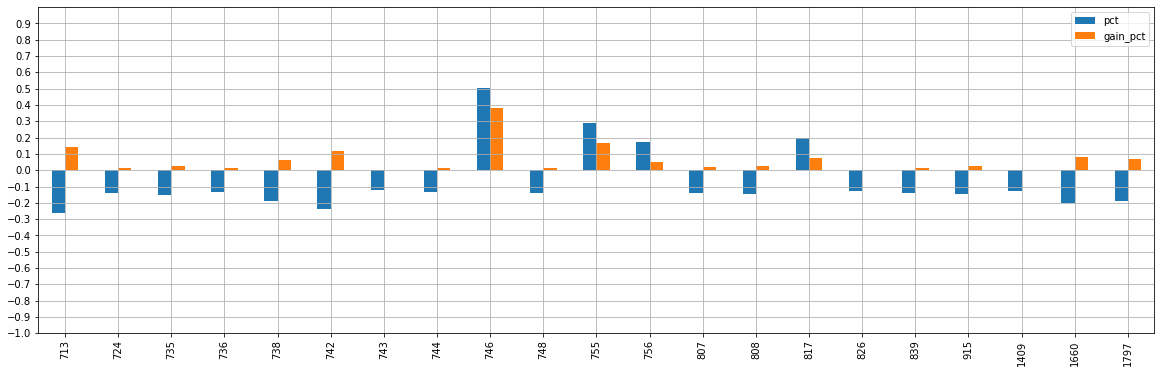

In [186]:
df2[(df2["pct"] > winThreshold) | (df2["pct"] < -winThreshold)][
    ["pct", "gain_pct"]
].plot(
    kind="bar",
    ylim=(-1, 1),
    figsize=(20, 6),
    grid=True,
    yticks=tuple(np.arange(-1, 1, 0.1)),
)


In [187]:
print(
    "2SD wins ",
    len(df2[(df2["pct"] > winThreshold)]),
    "2SD losses ",
    len(df2[(df2["pct"] < -winThreshold)]),
)


2SD wins  4 2SD losses  17


<AxesSubplot:>

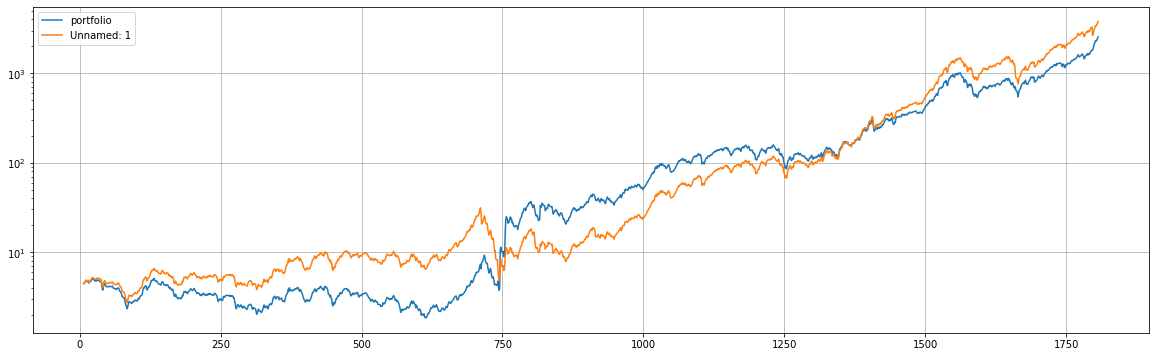

In [188]:
df2["portfolio"] = pfList
df2[['portfolio','Unnamed: 1']].plot(figsize=(20,6), grid=True, logy=True)

In [189]:
# How we do in the drawdowns
df2[(df2['pct'] < -winThreshold)][["Unnamed: 1", "portfolio", "pct", "gain_pct"]]

,Unnamed: 1,portfolio,pct,gain_pct
713,20.58,7.550320,-0.264737,0.142649
724,17.92,6.774560,-0.137632,0.015544
735,11.83,4.785860,-0.148921,0.026832
736,10.25,4.302773,-0.133559,0.011470
738,8.44,4.384793,-0.187680,0.065592
742,6.28,4.740555,-0.239709,0.117621
743,5.51,4.158141,-0.122611,0.000523
744,4.77,3.744598,-0.134301,0.012213
748,7.12,10.309052,-0.138015,0.015926
807,14.37,30.709211,-0.141577,0.019489


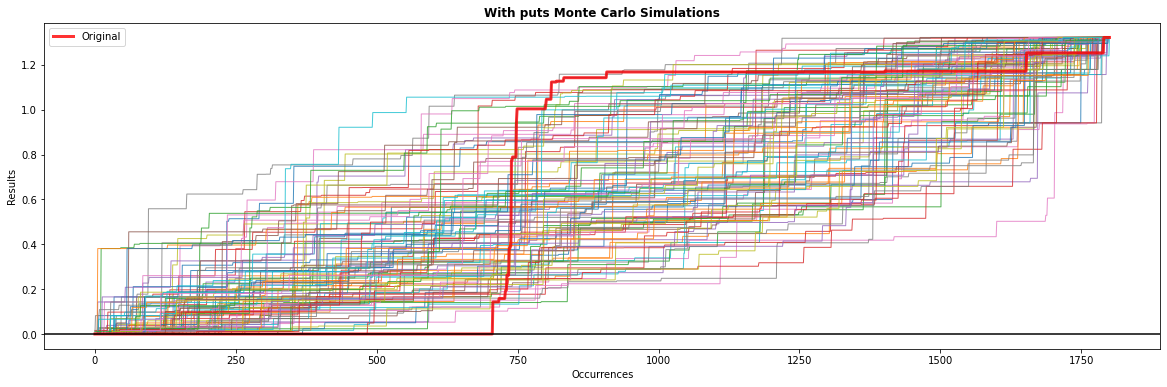

{'min': 1.3222006874602608, 'max': 1.3222006874602614, 'mean': 1.322200687460261, 'median': 1.322200687460261, 'std': 1.7429605027934764e-16, 'maxdd': nan, 'bust': 0.0, 'goal': 1.0}


In [190]:

mc = df2['gain_pct'].montecarlo(sims=100, bust=-0.25, goal=1)
mc.plot(title="With puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

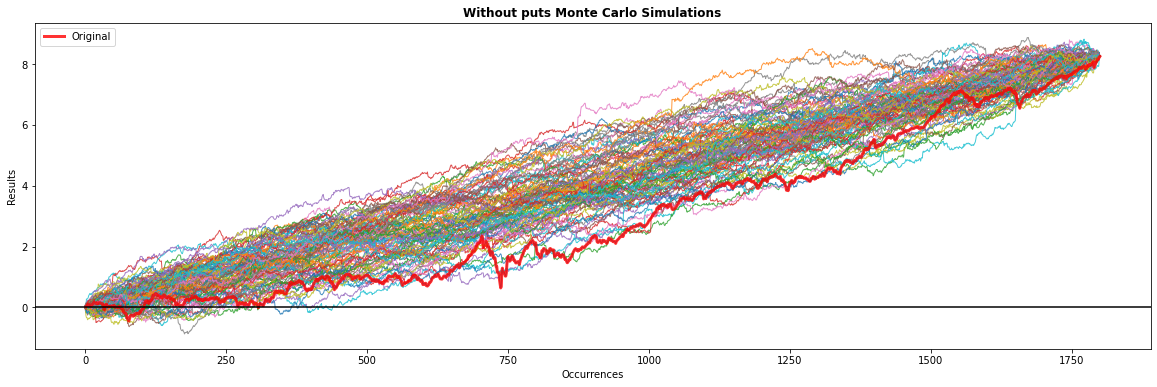

{'min': 8.250132331879204, 'max': 8.250132331879252, 'mean': 8.250132331879223, 'median': 8.250132331879225, 'std': 9.278438794577748e-15, 'maxdd': -0.8749324645573341, 'bust': 0.32, 'goal': 0.68}


In [191]:

mc = df2['pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Without puts Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

In [194]:
# If you want to dump to csv
# df2["power"] = pfList
# df2.to_csv("/Users/shan/Documents/power3.csv", index=False)

/var/folders/b7/nt75slqx7lgc80c_xh9gxg640000gn/T/ipykernel_93425/1493197684.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# With no mkt investment at all, pure barbell

In [179]:
# For each month, if the change is greater than the threshold then add the gain, else subtract the loss.
# BARBELL

df3 = df2.copy()

winThreshold = 2 * stdev  # capture the tail

multiplier = 1 # Must be divisible by 2 if following is False
usePutsOnly = True

interestPerMo = 6.25 / (100 * 12) # NOTE: LOL! OR Get by selling calls?
costOfOptions = (multiplier * 0.25 / 100) - interestPerMo 

def gain(row):
    if row["pct"] < -winThreshold:
        if usePutsOnly:
            # Do not divide the multiplier by 2
            retVal = (-row["pct"] - winThreshold) * multiplier
            return retVal
        else:
            retVal = (-row["pct"] - winThreshold) * multiplier / 2
            return retVal
    elif row["pct"] > winThreshold:
        if usePutsOnly:
            return 0
        else:
            retVal = (row["pct"] - winThreshold) * multiplier / 2
            return retVal
    return 0

df3["gain_pct"] = df3.apply(lambda row: gain(row), axis=1)
# shift the gain by 1 week for comparison
portfolioVal = df3.head(1)["Unnamed: 1"].values[0]
pfList = [portfolioVal]
# iterate over all rows of df3
for i, row in df3.shift(-1).iterrows():
    # Check gain_pct is nan
    if np.isnan(row["gain_pct"]):
        continue
    newPortfolioVal = portfolioVal * (1 - costOfOptions)
    optionsBump = portfolioVal * row["gain_pct"]
    portfolioVal = newPortfolioVal + optionsBump
    oldPfVal += oldPfVal * row["pct"]
    pfList.append(portfolioVal)
print(portfolioVal, len(pfList), len(df3), df3.tail(1)["Unnamed: 1"])


3462.4578147174284 1801 1801 1807    3793.748421
Name: Unnamed: 1, dtype: object


<AxesSubplot:>

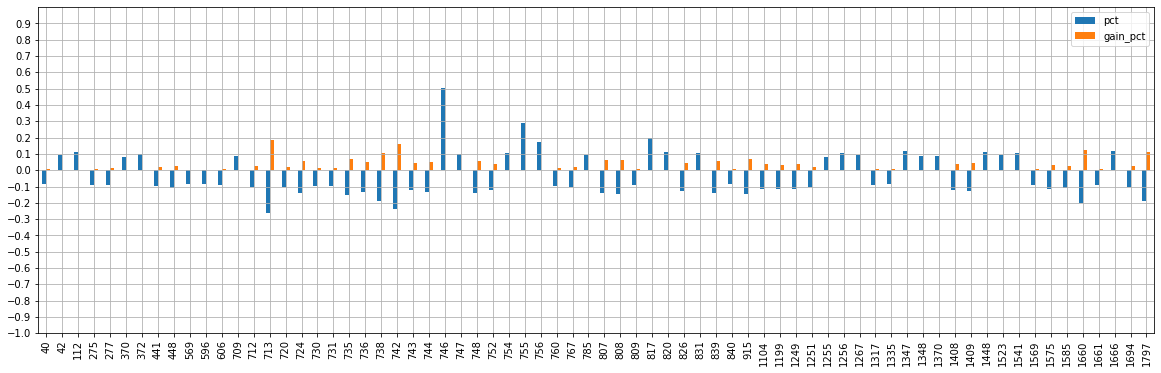

In [182]:
df3[(df3["pct"] > winThreshold) | (df3["pct"] < -winThreshold)][
    ["pct", "gain_pct"]
].plot(
    kind="bar",
    ylim=(-1, 1),
    figsize=(20, 6),
    grid=True,
    yticks=tuple(np.arange(-1, 1, 0.1)),
)


<AxesSubplot:>

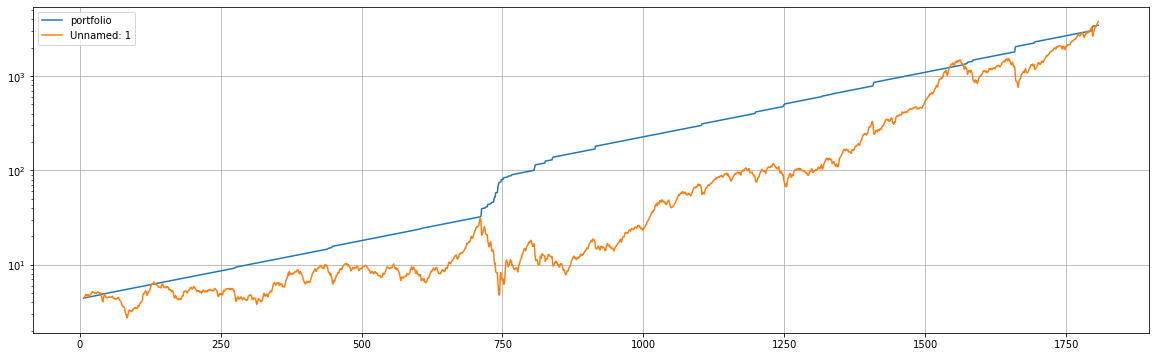

In [181]:
df3["portfolio"] = pfList
df3[['portfolio','Unnamed: 1']].plot(figsize=(20,6), grid=True, logy=True)

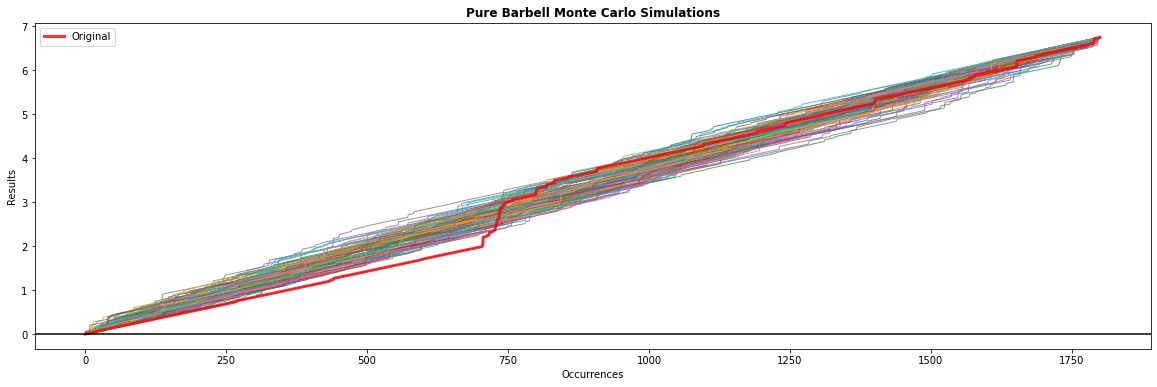

{'min': 6.741666470072734, 'max': 6.7416664700728015, 'mean': 6.741666470072775, 'median': 6.741666470072774, 'std': 1.1659632469897484e-14, 'maxdd': nan, 'bust': 0.0, 'goal': 1.0}


In [61]:

mc = df3['gain_pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Pure Barbell Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

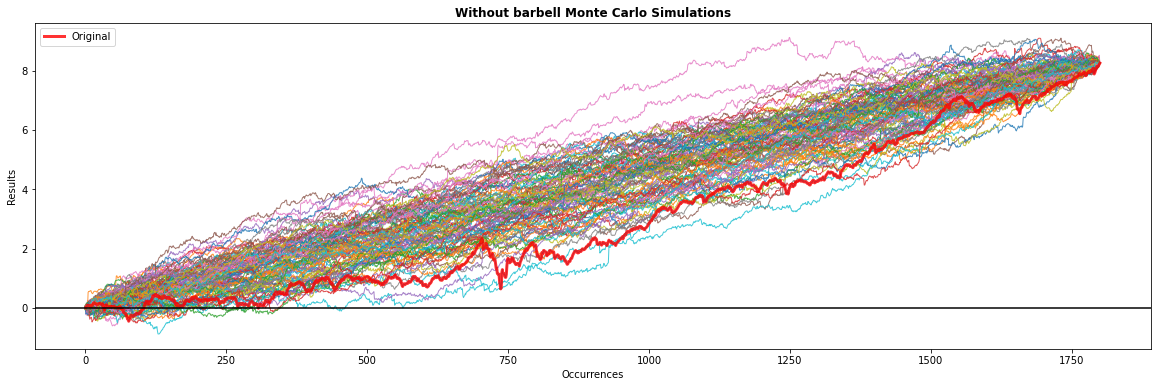

{'min': 8.250132331879191, 'max': 8.250132331879243, 'mean': 8.250132331879223, 'median': 8.250132331879225, 'std': 8.84222148719265e-15, 'maxdd': -0.8811239116844646, 'bust': 0.28, 'goal': 0.72}


In [43]:

mc = df3['pct'].montecarlo(sims=100, bust=-0.2, goal=1)
mc.plot(title="Without barbell Monte Carlo Simulations", figsize=(20, 6))
print(mc.stats)

In [209]:
print(df2[["Unnamed: 1", "portfolio", "pct", "gain_pct"]].tail(20))

       Unnamed: 1    portfolio       pct  gain_pct
1788      2890.17  2890.170000  0.012422  0.002751
1789  2996.113636  2996.113636  0.036657  0.002751
1790  2897.498182  2897.498182 -0.032914  0.002751
1791     2982.156  2982.156000  0.029218  0.002751
1792      2977.68  2977.680000 -0.001501  0.002751
1793    3104.9045  3104.904500  0.042726  0.002751
1794  3176.749524  3176.749524  0.023139  0.002751
1795  3278.202857  3278.202857  0.031936  0.002751
1796  3277.314211  3287.222625 -0.000271  0.002751
1797  2652.393636  3660.099318 -0.190681  0.113432
1798  2761.975238  3670.169850  0.041314  0.002751
1799     2919.615  3680.268090  0.057075  0.002751
1800  3104.660909  3690.394115  0.063380  0.002751
1801  3207.619091  3700.548001  0.033162  0.002751
1802      3391.71  3710.729825  0.057392  0.002751
1803  3365.516667  3720.939664 -0.007723  0.002751
1804  3418.701364  3731.177594  0.015803  0.002751
1805    3548.9925  3741.443693  0.038111  0.002751
1806      3695.31  3751.738039 

# Daily DOW data

In [194]:
df5 = pd.read_csv("/Users/shan/Documents/RWRI Code/USETHIS.csv")
df5 = df5[5400:] # Because mkt was closed for 6mo
# reverse df2
# df2 = df2.iloc[::-1]

df5.head(10)

,Date,Value
5400,1914-12-14,56.76
5401,1914-12-15,55.07
5402,1914-12-16,55.35
5403,1914-12-17,55.36
5404,1914-12-18,55.09
5405,1914-12-19,55.2
5406,1914-12-21,54.46
5407,1914-12-22,54.42
5408,1914-12-23,53.46
5409,1914-12-24,53.17


In [195]:
df5['Datetime'] = pd.to_datetime(df5['Date'])
df5.set_index(['Datetime'], inplace=True)
df5['Value'] = df5['Value'].str.replace(',', '').astype(float)
df5["Value"] = pd.to_numeric(df5["Value"], downcast="float")

In [111]:
df5.head(1000)["Value"]


Datetime
1914-12-14    56.759998
1914-12-15    55.070000
1914-12-16    55.349998
1914-12-17    55.360001
1914-12-18    55.090000
                ...    
1918-04-11    75.580002
1918-04-12    76.250000
1918-04-13    76.010002
1918-04-15    77.510002
1918-04-16    77.209999
Name: Value, Length: 1000, dtype: float32

In [114]:
monthly = df5["Value"].resample('M').ohlc()
print (monthly)

                    open          high           low         close
Datetime                                                          
1914-12-31     56.759998     56.759998     53.169998     54.580002
1915-01-31     54.630001     58.520000     54.630001     57.160000
1915-02-28     55.590000     57.830002     54.220001     55.180000
1915-03-31     55.290001     61.299999     55.290001     60.830002
1915-04-30     61.049999     71.779999     61.049999     71.779999
...                  ...           ...           ...           ...
2021-07-31  34633.531250  35144.308594  33962.039062  34935.468750
2021-08-31  34838.160156  35625.398438  34792.671875  35360.730469
2021-09-30  35312.531250  35443.820312  33843.921875  33843.921875
2021-10-31  34326.460938  35819.558594  34002.921875  35819.558594
2021-11-30  35913.839844  36432.218750  34483.718750  34483.718750

[1284 rows x 4 columns]


In [196]:
weekly = df5["Value"].resample('W').ohlc()
print (weekly)

                    open          high           low         close
Datetime                                                          
1914-12-20     56.759998     56.759998     55.070000     55.200001
1914-12-27     54.459999     54.459999     53.169998     53.340000
1915-01-03     54.549999     54.630001     54.549999     54.630001
1915-01-10     55.439999     56.549999     55.400002     56.540001
1915-01-17     57.369999     57.900002     57.189999     57.189999
1915-01-24     58.119999     58.520000     58.110001     58.520000
1915-01-31     58.060001     58.240002     56.540001     57.160000
1915-02-07     55.590000     57.259998     55.590000     56.330002
1915-02-14     56.310001     57.830002     56.310001     57.200001
1915-02-21     57.020000     57.020000     55.200001     55.200001
1915-02-28     54.400002     55.180000     54.220001     55.180000
1915-03-07     55.290001     56.509998     55.290001     56.410000
1915-03-14     56.980000     56.980000     56.349998     56.34

In [197]:
weekly["pct"] = weekly["close"].pct_change()

In [200]:
len(weekly[weekly["pct"] < 0.01]), len(weekly)

(3740, 5582)

In [134]:
stdev = weekly["pct"].std()
print(stdev)


0.025032688


In [153]:
twoweekly = df5["Value"].resample('2W').ohlc()
#print (twoweekly)
twoweekly["close"].pct_change().std()

0.035473306